In [1]:
import scipy
scipy.__version__

'1.4.1'

In [2]:
!python -V

Python 3.6.10 :: Anaconda, Inc.


# TODS

## Introduction Summary

TODS is a full-stack automated machine learning system for outlier detection on multivariate time-series data. TODS provides exhaustive modules for building machine learning-based outlier detection systems, including: data processing, time series processing, feature analysis (extraction), detection algorithms, and reinforcement module. The functionalities provided via these modules include data preprocessing for general purposes, time series data smoothing/transformation, extracting features from time/frequency domains, various detection algorithms, and involving human expertise to calibrate the system. Three common outlier detection scenarios on time-series data can be performed: point-wise detection (time points as outliers), pattern-wise detection (subsequences as outliers), and system-wise detection (sets of time series as outliers), and a wide-range of corresponding algorithms are provided in TODS. This package is developed by DATA Lab @ Texas A&M University.

## Packages

In [3]:
!pip install -e git+https://github.com/datamllab/tods.git#egg=tods

Obtaining tods from git+https://github.com/datamllab/tods.git#egg=tods
  Cloning https://github.com/datamllab/tods.git to ./src/tods
  Running command git clone -q https://github.com/datamllab/tods.git '/Users/wangyanghe/Desktop/Research/Tods Notebook/src/tods'


  Attempting uninstall: tods
    Found existing installation: tods 0.0.2
    Uninstalling tods-0.0.2:
      Successfully uninstalled tods-0.0.2
  Running setup.py develop for tods


In [4]:
%cd src/tods

/Users/wangyanghe/Desktop/Research/Tods Notebook/src/tods


In [5]:
!git checkout wangyanghe

Branch 'wangyanghe' set up to track remote branch 'wangyanghe' from 'origin'.
Switched to a new branch 'wangyanghe'


In [6]:
%cd examples/sk_examples

/Users/wangyanghe/Desktop/Research/Tods Notebook/src/tods/examples/sk_examples


In [7]:
!ls

500_UCR_Anomaly_robotDOG1_10000_19280_19360.txt
DeepLog_test.py
IsolationForest_test.py
MatrixProfile_test.py
Telemanom_test.py


## Imports

In [51]:
import sys
import argparse
import os
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import metrics

In [11]:
from tods.tods_skinterface.primitiveSKI.detection_algorithm.DeepLog_skinterface import DeepLogSKI

In [9]:
from tods.tods_skinterface.primitiveSKI.detection_algorithm.Telemanom_skinterface import TelemanomSKI

/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.truncated_svd module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)
d3m.primitives.tods.detection_algorithm.LSTMODetector: Primitive is not providing a description t

In [69]:
from d3m import index
from d3m.metadata.base import ArgumentType
from d3m.metadata.pipeline import Pipeline, PrimitiveStep
from axolotl.backend.simple import SimpleRunner
from tods import generate_dataset, generate_problem
from tods.searcher import BruteForceSearch

In [52]:
from tods import generate_dataset, load_pipeline, evaluate_pipeline

## Dataset

### UCR Dataset

In [13]:
data = np.loadtxt("./500_UCR_Anomaly_robotDOG1_10000_19280_19360.txt")

In [14]:
print("shape:", data.shape)
print("datatype of data:",data.dtype)
print("First 5 rows:\n", data[:5])

shape: (20000,)
datatype of data: float64
First 5 rows:
 [0.145299 0.128205 0.094017 0.076923 0.111111]


In [15]:
X_train = np.expand_dims(data[:10000], axis=1)
X_test = np.expand_dims(data[10000:], axis=1)

In [16]:
print("First 5 rows train:\n", X_train[:5])
print("First 5 rows test:\n", X_test[:5])

First 5 rows train:
 [[0.145299]
 [0.128205]
 [0.094017]
 [0.076923]
 [0.111111]]
First 5 rows test:
 [[0.076923]
 [0.076923]
 [0.076923]
 [0.094017]
 [0.145299]]


### Yahoo Dataset

In [17]:
data_yahoo = pd.read_csv('../../datasets/anomaly/raw_data/yahoo_sub_5.csv')

In [18]:
print("shape:", data_yahoo.shape)
print("First 5 rows:\n", data_yahoo[:5])

shape: (1400, 7)
First 5 rows:
    timestamp  value_0   value_1   value_2  value_3  value_4  anomaly
0          1    12183  0.000000  3.716667        5     2109        0
1          2    12715  0.091758  3.610833       60     3229        0
2          3    12736  0.172297  3.481389       88     3637        0
3          4    12716  0.226219  3.380278       84     1982        0
4          5    12739  0.176358  3.193333      111     2751        0


## SK Example 1: DeepLog

In [19]:
transformer = DeepLogSKI()
transformer.fit(X_train)
prediction_labels_train = transformer.predict(X_train)
prediction_labels_test = transformer.predict(X_test)
prediction_score = transformer.predict_score(X_test)

Epoch 1/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4239 - val_loss: 0.2694
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3344 - val_loss: 0.2818
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3444 - val_loss: 0.2806
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3575 - val_loss: 0.2731
Epoch 5/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3364 - val_loss: 0.2783
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3447 - val_loss: 0.2742
Epoch 7/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3357 - val_loss: 0.2586
Epoch 8/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3392 - val_loss: 0.2804
Epoch 9/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3442 - val_loss: 0.2691
Epoch 10/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3475 - val_loss: 0.2683

/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [20]:
print("Primitive: ", transformer.primitive)
print("Prediction Labels\n", prediction_labels_test)
print("Prediction Score\n", prediction_score)

Primitive:  d3m.primitives.tods.detection_algorithm.deeplog(hyperparams=Hyperparams({'contamination': 0.1, 'window_size': 1, 'step_size': 1, 'return_subseq_inds': False, 'use_columns': (), 'exclude_columns': (), 'return_result': 'new', 'use_semantic_types': False, 'add_index_columns': False, 'error_on_no_input': True, 'return_semantic_type': 'https://metadata.datadrivendiscovery.org/types/Attribute', 'hidden_size': 64, 'loss': 'mean_squared_error', 'optimizer': 'Adam', 'epochs': 10, 'batch_size': 32, 'dropout_rate': 0.2, 'l2_regularizer': 0.1, 'validation_size': 0.1, 'features': 1, 'stacked_layers': 1, 'preprocessing': True, 'verbose': 1}), random_seed=0)
Prediction Labels
 [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Prediction Score
 [[0.        ]
 [0.3569443 ]
 [0.3569443 ]
 ...
 [0.77054234]
 [0.4575615 ]
 [0.17499346]]


In [21]:
y_true = prediction_labels_train
y_pred = prediction_labels_test
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
f1_scores = 2*recall*precision/(recall+precision)
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [22]:
print('Accuracy Score: ', accuracy_score(y_true, y_pred))

Accuracy Score:  0.903


In [23]:
confusion_matrix(y_true, y_pred)

array([[8646,  358],
       [ 612,  384]])

In [24]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9004
           1       0.52      0.39      0.44       996

    accuracy                           0.90     10000
   macro avg       0.73      0.67      0.69     10000
weighted avg       0.89      0.90      0.90     10000



In [25]:
print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))

Best threshold:  1
Best F1-Score:  0.4418872266973533


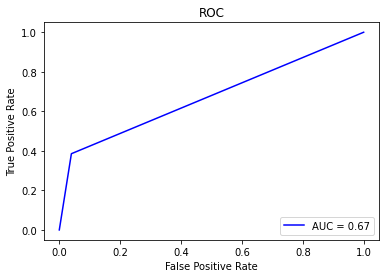

In [26]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SK Example 2: Telemanom

In [30]:
transformer = TelemanomSKI(l_s= 2, n_predictions= 1)
transformer.fit(X_train)
prediction_labels_train = transformer.predict(X_train)
prediction_labels_test = transformer.predict(X_test)
prediction_score = transformer.predict_score(X_test)

125/125 [==============================] - 1s 8ms/step - loss: 0.0112 - val_loss: 0.0046


/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [31]:
print("Primitive: ", transformer.primitive)
print("Prediction Labels\n", prediction_labels_test)
print("Prediction Score\n", prediction_score)

Primitive:  d3m.primitives.tods.detection_algorithm.telemanom(hyperparams=Hyperparams({'contamination': 0.1, 'window_size': 1, 'step_size': 1, 'return_subseq_inds': False, 'use_columns': (), 'exclude_columns': (), 'return_result': 'new', 'use_semantic_types': False, 'add_index_columns': False, 'error_on_no_input': True, 'return_semantic_type': 'https://metadata.datadrivendiscovery.org/types/Attribute', 'smoothing_perc': 0.05, 'window_size_': 100, 'error_buffer': 50, 'batch_size': 70, 'dropout': 0.3, 'validation_split': 0.2, 'optimizer': 'Adam', 'lstm_batch_size': 64, 'loss_metric': 'mean_squared_error', 'layers': [10, 10], 'epochs': 1, 'patience': 10, 'min_delta': 0.0003, 'l_s': 2, 'n_predictions': 1, 'p': 0.05}), random_seed=0)
Prediction Labels
 [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Prediction Score
 [[0.08822848]
 [0.07965706]
 [0.05999164]
 ...
 [0.05911084]
 [0.05963569]
 [0.06003137]]


In [32]:
y_true = prediction_labels_train
y_pred = prediction_labels_test
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
f1_scores = 2*recall*precision/(recall+precision)
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [33]:
print('Accuracy Score: ', accuracy_score(y_true, y_pred))

Accuracy Score:  0.1839551865559668


In [34]:
confusion_matrix(y_true, y_pred)

array([[ 990, 8007],
       [ 151,  849]])

In [35]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.11      0.20      8997
           1       0.10      0.85      0.17      1000

    accuracy                           0.18      9997
   macro avg       0.48      0.48      0.18      9997
weighted avg       0.79      0.18      0.19      9997



In [36]:
print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))

Best threshold:  0
Best F1-Score:  0.18186778212239701


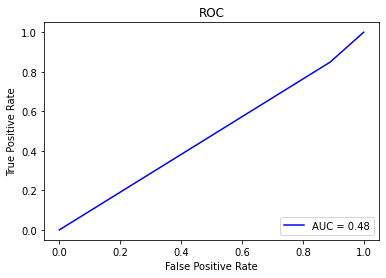

In [37]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Pipline Example: AutoEncoder

### Build Pipeline

In [38]:
# Creating pipeline
pipeline_description = Pipeline()
pipeline_description.add_input(name='inputs')

'inputs.0'

In [39]:
# Step 0: dataset_to_dataframe
step_0 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.data_processing.dataset_to_dataframe'))
step_0.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='inputs.0')
step_0.add_output('produce')
pipeline_description.add_step(step_0)

While loading primitive 'tods.data_processing.dataset_to_dataframe', an error has been detected: (networkx 2.5 (/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages), Requirement.parse('networkx==2.4'), {'tamu-axolotl'})
Attempting to load primitive 'tods.data_processing.dataset_to_dataframe' without checking requirements.


In [41]:
# Step 1: column_parser
step_1 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.data_processing.column_parser'))
step_1.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='steps.0.produce')
step_1.add_output('produce')
pipeline_description.add_step(step_1)

While loading primitive 'tods.data_processing.column_parser', an error has been detected: (networkx 2.5 (/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages), Requirement.parse('networkx==2.4'), {'tamu-axolotl'})
Attempting to load primitive 'tods.data_processing.column_parser' without checking requirements.


In [42]:
# Step 2: extract_columns_by_semantic_types(attributes)
step_2 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.data_processing.extract_columns_by_semantic_types'))
step_2.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='steps.1.produce')
step_2.add_output('produce')
step_2.add_hyperparameter(name='semantic_types', argument_type=ArgumentType.VALUE,
							  data=['https://metadata.datadrivendiscovery.org/types/Attribute'])
pipeline_description.add_step(step_2)

While loading primitive 'tods.data_processing.extract_columns_by_semantic_types', an error has been detected: (networkx 2.5 (/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages), Requirement.parse('networkx==2.4'), {'tamu-axolotl'})
Attempting to load primitive 'tods.data_processing.extract_columns_by_semantic_types' without checking requirements.


In [43]:
# Step 3: extract_columns_by_semantic_types(targets)
step_3 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.data_processing.extract_columns_by_semantic_types'))
step_3.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='steps.0.produce')
step_3.add_output('produce')
step_3.add_hyperparameter(name='semantic_types', argument_type=ArgumentType.VALUE,
							data=['https://metadata.datadrivendiscovery.org/types/TrueTarget'])
pipeline_description.add_step(step_3)

In [44]:
attributes = 'steps.2.produce'
targets = 'steps.3.produce'

In [45]:
# Step 4: processing
step_4 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.feature_analysis.statistical_maximum'))
step_4.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference=attributes)
step_4.add_output('produce')
pipeline_description.add_step(step_4)

While loading primitive 'tods.feature_analysis.statistical_maximum', an error has been detected: (networkx 2.5 (/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages), Requirement.parse('networkx==2.4'), {'tamu-axolotl'})
Attempting to load primitive 'tods.feature_analysis.statistical_maximum' without checking requirements.


In [46]:
# Step 5: algorithm`
step_5 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.detection_algorithm.pyod_ae'))
step_5.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='steps.4.produce')
step_5.add_output('produce')
pipeline_description.add_step(step_5)

While loading primitive 'tods.detection_algorithm.pyod_ae', an error has been detected: (networkx 2.5 (/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages), Requirement.parse('networkx==2.4'), {'tamu-axolotl'})
Attempting to load primitive 'tods.detection_algorithm.pyod_ae' without checking requirements.


In [47]:
# Step 6: Predictions
step_6 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.data_processing.construct_predictions'))
step_6.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='steps.5.produce')
step_6.add_argument(name='reference', argument_type=ArgumentType.CONTAINER, data_reference='steps.1.produce')
step_6.add_output('produce')
pipeline_description.add_step(step_6)

While loading primitive 'tods.data_processing.construct_predictions', an error has been detected: (networkx 2.5 (/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages), Requirement.parse('networkx==2.4'), {'tamu-axolotl'})
Attempting to load primitive 'tods.data_processing.construct_predictions' without checking requirements.


In [48]:
# Final Output
pipeline_description.add_output(name='output predictions', data_reference='steps.6.produce')

'outputs.0'

In [49]:
# Output to json
data = pipeline_description.to_json()
with open('autoencoder_pipeline.json', 'w') as f:
    f.write(data)
    print(data)

{"id": "5ea6f8e5-e938-43e3-9dd4-4c9451bb8821", "schema": "https://metadata.datadrivendiscovery.org/schemas/v0/pipeline.json", "created": "2021-04-14T16:15:48.973138Z", "inputs": [{"name": "inputs"}], "outputs": [{"data": "steps.6.produce", "name": "output predictions"}], "steps": [{"type": "PRIMITIVE", "primitive": {"id": "4b42ce1e-9b98-4a25-b68e-fad13311eb65", "version": "0.3.0", "python_path": "d3m.primitives.tods.data_processing.dataset_to_dataframe", "name": "Extract a DataFrame from a Dataset", "digest": "fb5cd27ebf69b9587b23940618071ba9ffe9f47ebd7772797d61ae0521f92515"}, "arguments": {"inputs": {"type": "CONTAINER", "data": "inputs.0"}}, "outputs": [{"id": "produce"}]}, {"type": "PRIMITIVE", "primitive": {"id": "d510cb7a-1782-4f51-b44c-58f0236e47c7", "version": "0.6.0", "python_path": "d3m.primitives.tods.data_processing.column_parser", "name": "Parses strings into their types", "digest": "62af3e97e2535681a0b1320e4ac97edeba15895862a46244ab079c47ce56958d"}, "arguments": {"inputs":

### Run Pipeline

In [54]:
this_path = os.path.dirname(os.path.abspath("__file__"))
default_data_path = os.path.join(this_path, '../../datasets/anomaly/raw_data/yahoo_sub_5.csv')

In [64]:
parser = argparse.ArgumentParser(description='Arguments for running predefined pipelin.')
parser.add_argument('--table_path', type=str, default=default_data_path,
                    help='Input the path of the input data table')
parser.add_argument('--target_index', type=int, default=6,
                    help='Index of the ground truth (for evaluation)')
parser.add_argument('--metric',type=str, default='F1_MACRO',
                    help='Evaluation Metric (F1, F1_MACRO)')
parser.add_argument('--pipeline_path', 
                    default=os.path.join(this_path, 'autoencoder_pipeline.json'),
                    help='Input the path of the pre-built pipeline description')


_StoreAction(option_strings=['--pipeline_path'], dest='pipeline_path', nargs=None, const=None, default='/Users/wangyanghe/Desktop/Research/Tods Notebook/src/tods/examples/sk_examples/autoencoder_pipeline.json', type=None, choices=None, help='Input the path of the pre-built pipeline description', metavar=None)

In [65]:
args, unknown = parser.parse_known_args()
table_path = args.table_path 
target_index = args.target_index # what column is the target
pipeline_path = args.pipeline_path
metric = args.metric # F1 on both label 0 and 1

In [66]:
# Read data and generate dataset
df = pd.read_csv(table_path)
dataset = generate_dataset(df, target_index)

In [67]:
# Load the default pipeline
pipeline = load_pipeline(pipeline_path)

In [68]:
# Run the pipeline
pipeline_result = evaluate_pipeline(dataset, pipeline, metric)
print(pipeline_result)
#raise pipeline_result.error[0]

Not all provided hyper-parameters for the data preparation pipeline 79ce71bd-db96-494b-a455-14f2e2ac5040 were used: ['method', 'number_of_folds', 'randomSeed', 'shuffle', 'stratified']


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
_________________________________________________________________
dropout_4 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                

Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7860 - val_loss: 0.5328
Epoch 66/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7836 - val_loss: 0.5305
Epoch 67/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7811 - val_loss: 0.5282
Epoch 68/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7792 - val_loss: 0.5260
Epoch 69/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7770 - val_loss: 0.5238
Epoch 70/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7745 - val_loss: 0.5218
Epoch 71/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7725 - val_loss: 0.5197
Epoch 72/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7704 - val_loss: 0.5178
Epoch 73/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7683 - val_loss: 0.5159
Epoch 74/100
40/40 [==============================] - 0s 1ms/step - loss: 0.7663 - val_loss: 0.5141


/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


{'method_called': 'evaluate',
 'outputs': "[{'outputs.0':      d3mIndex  anomaly"
            '0           0        1'
            '1           1        0'
            '2           2        1'
            '3           3        1'
            '4           4        1'
            '...       ...      ...'
            '1395     1395        1'
            '1396     1396        0'
            '1397     1397        1'
            '1398     1398        1'
            '1399     1399        1'
            ''
            "[1400 rows x 2 columns]}, {'outputs.0':      d3mIndex  anomaly"
            '0           0        1'
            '1           1        0'
            '2           2        1'
            '3           3        1'
            '4           4        1'
            '...       ...      ...'
            '1395     1395        1'
            '1396     1396        0'
            '1397     1397        1'
            '1398     1398        1'
            '1399     1399        1'
            

## Searcher Example:

In [70]:
table_path = '../../datasets/anomaly/raw_data/yahoo_sub_5.csv'
target_index = 6 # what column is the target
time_limit = 30 # How many seconds you wanna search

In [71]:
metric = 'F1_MACRO' # F1 on both label 0 and 1

In [72]:
# Read data and generate dataset and problem
df = pd.read_csv(table_path)
dataset = generate_dataset(df, target_index=target_index)
problem_description = generate_problem(dataset, metric)

In [73]:
# Start backend
backend = SimpleRunner(random_seed=0)

In [74]:
# Start search algorithm
search = BruteForceSearch(problem_description=problem_description,
                          backend=backend)

In [75]:
# Find the best pipeline
best_runtime, best_pipeline_result = search.search_fit(input_data=[dataset], time_limit=time_limit)
best_pipeline = best_runtime.pipeline
best_output = best_pipeline_result.output

Not all provided hyper-parameters for the data preparation pipeline 79ce71bd-db96-494b-a455-14f2e2ac5040 were used: ['method', 'number_of_folds', 'randomSeed', 'shuffle', 'stratified']


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_7 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_8 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_9 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                

Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6080 - val_loss: 0.4820
Epoch 66/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6065 - val_loss: 0.4806
Epoch 67/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6050 - val_loss: 0.4794
Epoch 68/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6035 - val_loss: 0.4781
Epoch 69/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6020 - val_loss: 0.4770
Epoch 70/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6007 - val_loss: 0.4758
Epoch 71/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5994 - val_loss: 0.4747
Epoch 72/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5981 - val_loss: 0.4736
Epoch 73/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5969 - val_loss: 0.4726
Epoch 74/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5958 - val_loss: 0.4716


/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
Traceback (most recent call last):
  File "/Users/wangyanghe/Desktop/Research/tods/tods/searcher/brute_force_search.py", line 62, in _search
    for error in pipeline_result.error:
TypeError: 'NoneType' object is not iterable
Not all provided hyper-parameters for the data preparation pipeline 79ce71bd-db96-494b-a455-14f2e2ac5040 were used: ['method', 'number_of_folds', 'randomSeed', 'shuffle', 'stratified']


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_12 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_13 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_14 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 4)                

Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6252 - val_loss: 0.3874
Epoch 66/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6233 - val_loss: 0.3861
Epoch 67/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6213 - val_loss: 0.3848
Epoch 68/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6195 - val_loss: 0.3836
Epoch 69/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6180 - val_loss: 0.3824
Epoch 70/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6162 - val_loss: 0.3813
Epoch 71/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6150 - val_loss: 0.3802
Epoch 72/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6135 - val_loss: 0.3791
Epoch 73/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6118 - val_loss: 0.3781
Epoch 74/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6104 - val_loss: 0.3771


/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
Traceback (most recent call last):
  File "/Users/wangyanghe/Desktop/Research/tods/tods/searcher/brute_force_search.py", line 62, in _search
    for error in pipeline_result.error:
TypeError: 'NoneType' object is not iterable


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_17 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_18 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_19 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                

Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5898 - val_loss: 0.6753
Epoch 66/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5880 - val_loss: 0.6739
Epoch 67/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5865 - val_loss: 0.6726
Epoch 68/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5848 - val_loss: 0.6713
Epoch 69/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5832 - val_loss: 0.6700
Epoch 70/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5817 - val_loss: 0.6689
Epoch 71/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5804 - val_loss: 0.6677
Epoch 72/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5790 - val_loss: 0.6666
Epoch 73/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5777 - val_loss: 0.6655
Epoch 74/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5764 - val_loss: 0.6645


/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [76]:
# Evaluate the best pipeline
best_scores = search.evaluate(best_pipeline).scores

Not all provided hyper-parameters for the data preparation pipeline 79ce71bd-db96-494b-a455-14f2e2ac5040 were used: ['method', 'number_of_folds', 'randomSeed', 'shuffle', 'stratified']


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_22 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_23 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_24 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 4)                

Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6192 - val_loss: 0.3883
Epoch 66/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6176 - val_loss: 0.3870
Epoch 67/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6158 - val_loss: 0.3857
Epoch 68/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6143 - val_loss: 0.3845
Epoch 69/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6130 - val_loss: 0.3833
Epoch 70/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6116 - val_loss: 0.3821
Epoch 71/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6103 - val_loss: 0.3810
Epoch 72/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6090 - val_loss: 0.3799
Epoch 73/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6079 - val_loss: 0.3789
Epoch 74/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6068 - val_loss: 0.3779


/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/Users/wangyanghe/anaconda3/envs/tods2/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [79]:
print('Search History:')
for pipeline_result in search.history:
    print('-' * 52)
    print('Pipeline id:', pipeline_result.pipeline.id)
    print(pipeline_result.scores)

Search History:
----------------------------------------------------
Pipeline id: 108e1dce-67e7-45f2-962c-1965d988710a
     metric     value  normalized  randomSeed  fold
0  F1_MACRO  0.708549    0.708549           0     0
----------------------------------------------------
Pipeline id: 2a42a07c-0263-427c-b6c8-d9ce45ac0b21
     metric     value  normalized  randomSeed  fold
0  F1_MACRO  0.616695    0.616695           0     0


In [80]:
print('Best pipeline:')
print('-' * 52)
print('Pipeline id:', best_pipeline.id)
print('Pipeline json:', best_pipeline.to_json())
print('Output:')
print(best_output)
print('Scores:')
print(best_scores)

Best pipeline:
----------------------------------------------------
Pipeline id: 108e1dce-67e7-45f2-962c-1965d988710a
Pipeline json: {"id": "108e1dce-67e7-45f2-962c-1965d988710a", "schema": "https://metadata.datadrivendiscovery.org/schemas/v0/pipeline.json", "created": "2021-04-14T16:38:58.226503Z", "inputs": [{"name": "inputs"}], "outputs": [{"data": "steps.7.produce", "name": "output predictions"}], "steps": [{"type": "PRIMITIVE", "primitive": {"id": "4b42ce1e-9b98-4a25-b68e-fad13311eb65", "version": "0.3.0", "python_path": "d3m.primitives.tods.data_processing.dataset_to_dataframe", "name": "Extract a DataFrame from a Dataset", "digest": "fb5cd27ebf69b9587b23940618071ba9ffe9f47ebd7772797d61ae0521f92515"}, "arguments": {"inputs": {"type": "CONTAINER", "data": "inputs.0"}}, "outputs": [{"id": "produce"}]}, {"type": "PRIMITIVE", "primitive": {"id": "d510cb7a-1782-4f51-b44c-58f0236e47c7", "version": "0.6.0", "python_path": "d3m.primitives.tods.data_processing.column_parser", "name": "Par